In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df=pd.read_csv('prediction.csv')

if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,9.446992,9.175438,8.930891,5.370638,7.891705,7.199678
1,2,3,8.861917,9.191259,9.166284,7.474772,8.099858,7.482682
2,2,3,8.756840,9.083529,8.947026,7.785721,8.165364,8.967632
3,1,3,9.492960,7.087574,8.348064,8.764834,6.230481,7.489412
4,2,3,10.026413,8.596189,8.881697,8.272826,7.483244,8.553718


In [3]:
X = df.drop(columns=["Channel", "Region"])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

sil_scores = []
db_scores = []
ch_scores = []
K = range(2, 11)  

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    
    sil = silhouette_score(X_scaled, labels)
    db = davies_bouldin_score(X_scaled, labels)
    ch = calinski_harabasz_score(X_scaled, labels)
    
    sil_scores.append(sil)
    db_scores.append(db)
    ch_scores.append(ch)
    
    print(f"k={k}: Silhouette={sil:.3f}, Davies-Bouldin={db:.3f}, Calinski-Harabasz={ch:.1f}")


k=2: Silhouette=0.290, Davies-Bouldin=1.352, Calinski-Harabasz=189.0
k=3: Silhouette=0.259, Davies-Bouldin=1.341, Calinski-Harabasz=152.8
k=4: Silhouette=0.188, Davies-Bouldin=1.541, Calinski-Harabasz=131.3
k=5: Silhouette=0.192, Davies-Bouldin=1.484, Calinski-Harabasz=118.0
k=6: Silhouette=0.201, Davies-Bouldin=1.432, Calinski-Harabasz=108.3
k=7: Silhouette=0.196, Davies-Bouldin=1.392, Calinski-Harabasz=103.2
k=8: Silhouette=0.185, Davies-Bouldin=1.441, Calinski-Harabasz=96.7
k=9: Silhouette=0.197, Davies-Bouldin=1.383, Calinski-Harabasz=92.3
k=10: Silhouette=0.191, Davies-Bouldin=1.344, Calinski-Harabasz=87.6


In [11]:
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
k_labels = kmeans.fit_predict(X_scaled)
df["KMeans_Cluster"] = k_labels
pca_df = pd.DataFrame(data=pca_result, columns=["PCA1", "PCA2"])

pca_df["Cluster"] = kmeans.labels_
print(df["KMeans_Cluster"].value_counts())
silhouette = silhouette_score(X_scaled, k_labels)
davies = davies_bouldin_score(X_scaled, k_labels)
print(f"Silhouette Score for k=3: {silhouette:.3f}")
print("Davies-Bouldin Score:", davies)

KMeans_Cluster
2    213
1    147
0     80
Name: count, dtype: int64
Silhouette Score for k=3: 0.259
Davies-Bouldin Score: 1.3405631342807725


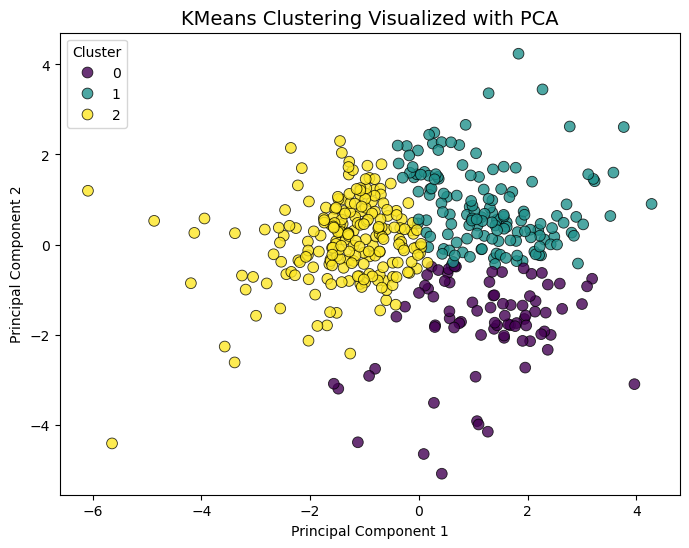

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="PCA1",
    y="PCA2",
    hue="Cluster",
    data=pca_df,
    palette="viridis",
    s=60,
    alpha=0.8,
    edgecolor="k"
)

plt.title("KMeans Clustering Visualized with PCA", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA
import pandas as pd

pca3 = PCA(n_components=3, random_state=42)
pca_result_3d = pca3.fit_transform(X_scaled)

pca3_df = pd.DataFrame(pca_result_3d, columns=["PCA1", "PCA2", "PCA3"])
pca3_df["Cluster"] = kmeans.labels_  
fig = px.scatter_3d(
    pca3_df,
    x="PCA1",
    y="PCA2",
    z="PCA3",
    color="Cluster",               
    symbol="Cluster",                 
    opacity=0.8
)

fig.update_traces(marker=dict(size=5, line=dict(width=0.5, color="black")))
fig.update_layout(
    title="KMeans Clustering Visualized with PCA (3D)",
    scene=dict(
        xaxis_title="Principal Component 1",
        yaxis_title="Principal Component 2",
        zaxis_title="Principal Component 3"
    )
)

fig.show()


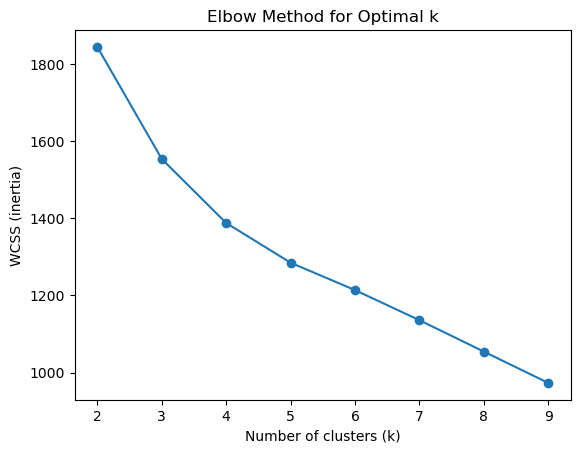

In [ ]:
wcss = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 10), wcss, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS ")
plt.title("Elbow Method for Optimal k")
plt.show()

In [ ]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,KMeans_Cluster,PCA1,PCA2
0,2,3,9.446992,9.175438,8.930891,5.370638,7.891705,7.199678,1,1.380383,-0.304727
1,2,3,8.861917,9.191259,9.166284,7.474772,8.099858,7.482682,1,1.438870,0.537468
2,2,3,8.756840,9.083529,8.947026,7.785721,8.165364,8.967632,1,1.513453,1.232565
3,1,3,9.492960,7.087574,8.348064,8.764834,6.230481,7.489412,2,-0.825105,1.210790
4,2,3,10.026413,8.596189,8.881697,8.272826,7.483244,8.553718,1,0.802897,1.766046


In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

for eps in [0.5, 0.7, 0.9, 1.2, 1.5]:
    for min_samples in [3, 5, 7, 10]:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X_scaled)
        
        if len(set(labels)) <= 1:
            continue
        
        sil = silhouette_score(X_scaled, labels)
        dbi = davies_bouldin_score(X_scaled, labels)
        chi = calinski_harabasz_score(X_scaled, labels)
        
        print(f"eps={eps}, min_samples={min_samples} --> "
              f"Silhouette: {sil:.3f}, DBI: {dbi:.3f}, CHI: {chi:.1f}")


eps=0.5, min_samples=3 --> Silhouette: -0.399, DBI: 1.696, CHI: 2.6
eps=0.5, min_samples=5 --> Silhouette: -0.193, DBI: 1.856, CHI: 1.6
eps=0.7, min_samples=3 --> Silhouette: -0.303, DBI: 2.020, CHI: 5.7
eps=0.7, min_samples=5 --> Silhouette: -0.225, DBI: 2.185, CHI: 10.2
eps=0.7, min_samples=7 --> Silhouette: -0.287, DBI: 1.880, CHI: 6.3
eps=0.7, min_samples=10 --> Silhouette: -0.142, DBI: 1.987, CHI: 6.0
eps=0.9, min_samples=3 --> Silhouette: -0.227, DBI: 2.998, CHI: 6.4
eps=0.9, min_samples=5 --> Silhouette: 0.039, DBI: 3.392, CHI: 13.1
eps=0.9, min_samples=7 --> Silhouette: -0.062, DBI: 3.798, CHI: 9.8
eps=0.9, min_samples=10 --> Silhouette: 0.033, DBI: 2.420, CHI: 38.5
eps=1.2, min_samples=3 --> Silhouette: -0.064, DBI: 2.845, CHI: 7.6
eps=1.2, min_samples=5 --> Silhouette: 0.262, DBI: 4.538, CHI: 16.0
eps=1.2, min_samples=7 --> Silhouette: 0.263, DBI: 4.575, CHI: 15.9
eps=1.2, min_samples=10 --> Silhouette: 0.247, DBI: 4.198, CHI: 20.1
eps=1.5, min_samples=3 --> Silhouette: 0.299

Cluster counts:
DBSCAN_Cluster
-1     41
 0    399
Name: count, dtype: int64


C:\Users\Manoj\AppData\Local\Temp\ipykernel_20776\280123863.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




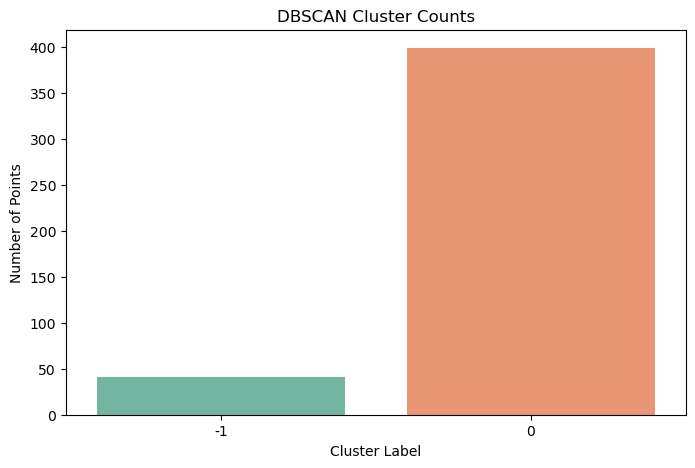

In [62]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

dbscan = DBSCAN(eps=1.5, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)

df["DBSCAN_Cluster"] = db_labels

print("Cluster counts:")
print(df["DBSCAN_Cluster"].value_counts().sort_index())
plt.figure(figsize=(8, 5))
sns.countplot(x="DBSCAN_Cluster", data=df, palette="Set2")
plt.title("DBSCAN Cluster Counts")
plt.xlabel("Cluster Label")
plt.ylabel("Number of Points")
plt.show()

Silhouette Score: 0.33324590864202575
Davies-Bouldin Index: 3.0152860803474772
Calinski-Harabasz Score: 21.072853101676795


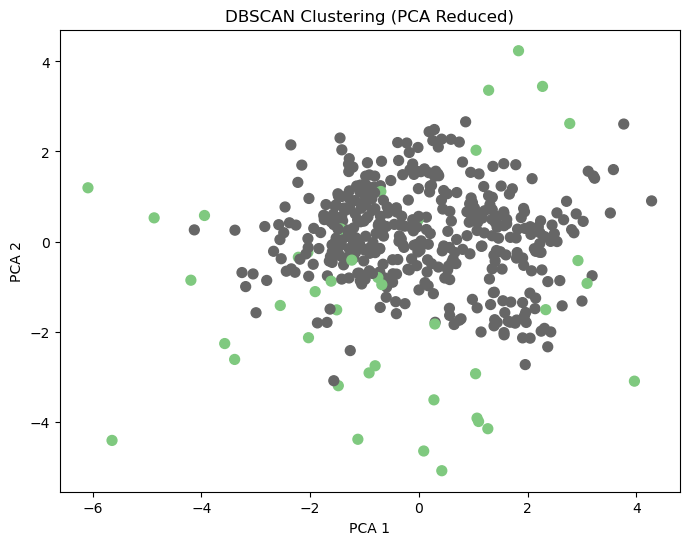

In [63]:
import numpy as np
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
res = []
if len(set(db_labels)):
    silhouette = silhouette_score(X_pca, db_labels)
    db_index = davies_bouldin_score(X_pca, db_labels)
    db_ch = calinski_harabasz_score(X_pca, db_labels)
else:
    silhouette, db_index, db_ch = np.nan, np.nan, np.nan

res.append([silhouette, db_index, db_ch, np.nan])

print("Silhouette Score:", silhouette)
print("Davies-Bouldin Index:", db_index)
print("Calinski-Harabasz Score:", db_ch)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=db_labels, cmap="Accent", s=50)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("DBSCAN Clustering (PCA Reduced)")
plt.show()

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

pca3 = PCA(n_components=3, random_state=42)
pca_result_3d = pca3.fit_transform(X_scaled)

pca3_df = pd.DataFrame(pca_result_3d, columns=["PCA1", "PCA2", "PCA3"])
pca3_df["DBSCAN"] = db_labels 
fig = px.scatter_3d(
    pca3_df,
    x="PCA1",
    y="PCA2",
    z="PCA3",
    color="DBSCAN",             
    color_continuous_scale="Viridis", 
    opacity=0.8,
    size_max=10
)

fig.update_traces(marker=dict(size=5, line=dict(width=0.5, color="black")))
fig.update_layout(
    title="DBSCAN Clusters in 3D PCA Space",
    scene=dict(
        xaxis_title="PCA1",
        yaxis_title="PCA2",
        zaxis_title="PCA3"
    )
)

fig.show()


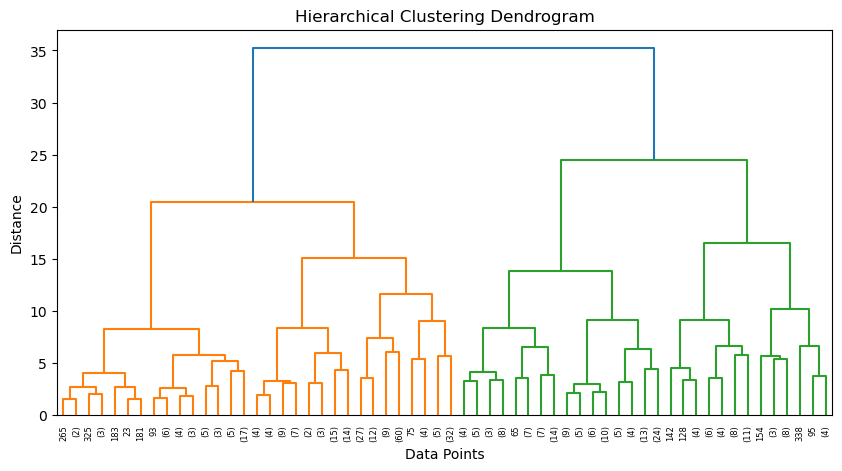

In [15]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
hier = AgglomerativeClustering(n_clusters=3, linkage='ward')
hier_labels = hier.fit_predict(X_scaled)
linkage_matrix = linkage(X_scaled, method="ward")

df["Hier_Cluster"] = hier_labels

plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


In [16]:
hier_silhouette = silhouette_score(X_scaled, hier_labels)
hier_davies = davies_bouldin_score(X_scaled, hier_labels)
hier_calinski = calinski_harabasz_score(X_scaled, hier_labels)

print("Silhouette Score:", hier_silhouette)
print("Davies-Bouldin Score:", hier_davies)

Silhouette Score: 0.2546567404941345
Davies-Bouldin Score: 1.5389948670687705


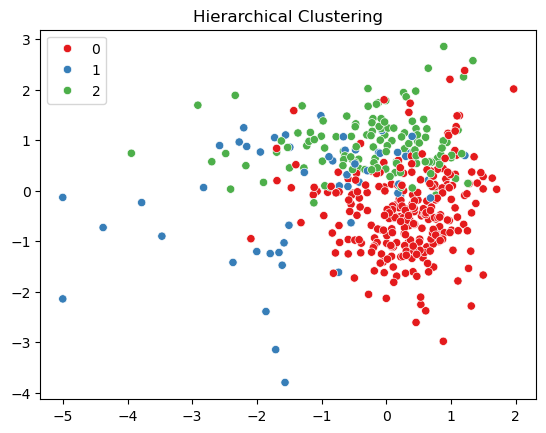

In [17]:
hc = AgglomerativeClustering(n_clusters=3, linkage="ward")
labels_hc = hc.fit_predict(X_scaled)

sil_hc = silhouette_score(X_scaled, labels_hc)
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=labels_hc, palette="Set1")
plt.title("Hierarchical Clustering")
plt.show()

In [68]:
import plotly.express as px
from sklearn.decomposition import PCA
import pandas as pd
pca3 = PCA(n_components=3, random_state=42)
pca_result_3d = pca3.fit_transform(X_scaled)

pca3_df = pd.DataFrame(pca_result_3d, columns=["PCA1", "PCA2", "PCA3"])
pca3_df["HierCluster"] = labels_hc 
fig = px.scatter_3d(
    pca3_df,
    x="PCA1", y="PCA2", z="PCA3",
    color="HierCluster",
    symbol="HierCluster",  
    opacity=0.8
)

fig.update_traces(marker=dict(size=5, line=dict(width=0.5, color="black")))
fig.update_layout(
    title="Hierarchical Clustering Visualized in 3D PCA Space",
    scene=dict(
        xaxis_title="PCA1",
        yaxis_title="PCA2",
        zaxis_title="PCA3"
    )
)

fig.show()
